In [1]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import os, sys
sys.path.append('..')
import common, sql
import pandas as pd
hm={
    'Maven Security Versions': 'MSV',
    'Github Dependabot' : 'Dependabot',
    'OWASP Dependency-Check' : 'OWASP DC',
    'Contrast' : 'Com. B',
    'SourceClear': 'Com. A'
}

In [2]:
q='''select distinct t.name as tool, v.id
from npmAlert nA
join vulnerability v on nA.vulnerabilityId = v.id
join tool t on nA.toolId = t.id
where toolId in (2,4,5)
and v.cveId is not null;'''
fullDf= sql.pd_read_sql(q)

In [41]:
l=[]
tools=[]
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    l.append(s)

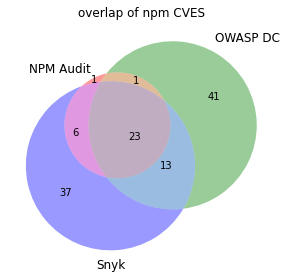

In [42]:
v= venn3(l, set_labels=tools)
plt.title('overlap of npm CVES')
plt.tight_layout()
plt.savefig('jscves.png')

In [43]:
q='''select distinct t.name as tool, d.packageId as id
        from npmAlert nA
        join dependency d on nA.dependencyId = d.id
        join tool t on nA.toolId = t.id
        where toolId in (2,4,5);'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    l.append(s)

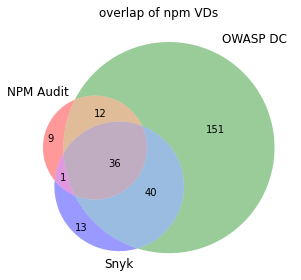

In [44]:
v= venn3(l, set_labels=tools)
plt.title('overlap of npm VDs')
plt.tight_layout()
plt.savefig('jsdeps.png')

In [45]:
q='''select distinct t.name as tool, v.id
    from mavenAlert mA
    join vulnerability v on mA.vulnerabilityId = v.id
    join tool t on mA.toolId = t.id
    where toolId in (2,4,7)
    and v.cveId is not null'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    l.append(s)

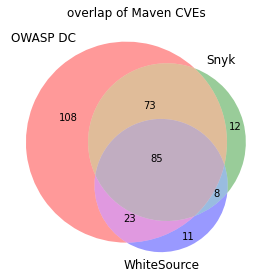

In [46]:
v= venn3(l, set_labels=tools)
plt.title('overlap of Maven CVEs')
plt.tight_layout()
plt.savefig('javacves.png')

In [47]:
q='''select distinct t.name as tool, d.packageId as id
    from mavenAlert mA
    join dependency d on mA.dependencyId = d.id
    join tool t on mA.toolId = t.id
    where toolId in (2,4,7)'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    l.append(s)

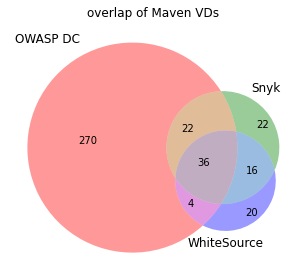

In [48]:
v= venn3(l, set_labels=tools)
plt.title('overlap of Maven VDs')
plt.tight_layout()
plt.savefig('javadeps.png')

In [7]:
q='''select dependencyId, count(dependencyPathId) as c from npmAlert mA
where toolId=5
group by dependencyId;'''
df=sql.pd_read_sql(q)
df.c.median(), df.c.max(), df.c.mean()

(2.0, 309, 12.853333333333333)

In [3]:
q='''select *
from mavenAlert mA
join dependency d on mA.dependencyId = d.id
join package p on d.packageId = p.id
join vulnerability v on mA.vulnerabilityId = v.id
where `group` = 'org.apache.activemq'
and toolId = 4;'''
df= sql.pd_read_sql(q)
sets=[]
arts=[]
for artifact, df in df.groupby('artifact'):
    arts.append(artifact)
    sets.append(set(df.cveId))
a,b,c=sets

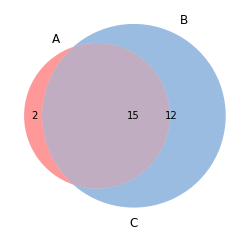

In [4]:
v=venn3(sets)

In [5]:
arts

['activeio-core', 'activemq-core', 'kahadb']

In [6]:
a-b

{'CVE-2010-0684', 'CVE-2010-1244'}

In [7]:
c-b

set()

In [8]:
b-a

{'CVE-2014-3600',
 'CVE-2014-3612',
 'CVE-2014-8110',
 'CVE-2015-1830',
 'CVE-2015-5254',
 'CVE-2015-6524',
 'CVE-2016-0734',
 'CVE-2016-0782',
 'CVE-2016-6810',
 'CVE-2018-8006',
 'CVE-2019-0222',
 'CVE-2020-1941'}

In [9]:
b-c

set()